# Descriptive Statistics


Descriptive statistics give the first insights into your data. This notebook will guide you through using pandas to gather and display the basic statistics of your dataset.

## Data
The data I use is available for downloaded from the kaggle housing challenge, a free login is requried.  

https://www.kaggle.com/camnugent/california-housing-prices/data

The data should reside in the same directory as this notebook, or the full path can be specified below.

In [1]:
# Jolynn Schmidt
# basic descriptive stats with Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# set the filename and the name of the column we will explore
my_data = "data/housing.csv"
col_name = "median_house_value"

#### Dataframes
Lets get started by just reading in the data and looking at it. The panda package has a function for reading in a csv file and creating a dataframe. The dataframe is a 2-dimensional labeled data structure and will include all rows and columns from the csv.

In [2]:
# read in the csv and check out the data
df = pd.read_csv(my_data)
df.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


A quick overview of the data shows that the values given are for groups of homes. Such as total rooms and total bedrooms. I will break these out into mean values per household.

#### Data type
You can view the data types for each column using .dtypes. The columns are referenced by the column heading.

In [3]:
#what are our data types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

#### Data description
To get a general overview you can use .describe and make a quick histogram for each column.

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Looking at the describe output, the data is really clean. The range of values seems consistant within data sets. Although it is not clear what the unit of measure is for median income, (10K per year, 1K per month?) the values have a realtive consistancy. The total_bedrooms seems to have some missing values and we will need to convert the catagorical data for ocean proximity. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029272C1DEB8>,
      dtype=object)

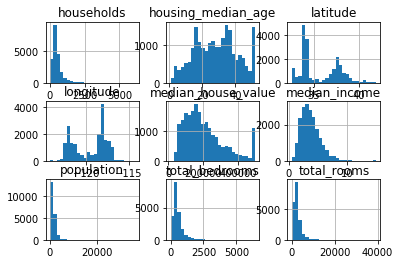

In [5]:
df.hist(bins = (25))

In [6]:
df['ocean_proximity'].value_counts(ascending=True)

ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
INLAND        6551
<1H OCEAN     9136
Name: ocean_proximity, dtype: int64

In [7]:
# Convert ocean_proximity to numeric 

# must be of type catagory
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

# convert
#df['ocean_proximity'] = df['ocean_proximity'].cat.codes.astype('float')
#df['ocean_proximity'].value_counts(ascending=True)

# Convert using One Hot
one_hot = pd.get_dummies(df['ocean_proximity'])
df = df.drop('ocean_proximity', axis = 1)
df = df.join(one_hot)

## Missing Data
Do we have missing values? I sum up the number of values that are null and find that this data is really clean with the exception of total_bedrooms. To deal with this we could do two different things. First, I could remove the rows that do not show total_bedrooms, or I could try and add in values. Lets explore this second option.

In [8]:
df.apply(lambda x: sum(x.isnull()),axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

Obviously the total number of bedrooms is based on all housing, not per household.

In [9]:
orig_br = df['total_bedrooms'].describe()
print(orig_br)

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


#### Impute data using kNN
I tried various methods for replacing the missing values and have chosen kNN. kNN maintained the standard deviationa and the median. You can see the results of the various options [here](http://localhost:8889/notebooks/repos/SpatialAnalysis_Python/Missing_data.ipynb)

In [10]:
# conda install ecos  
# conda install CVXcanon  
# pip install fancyimpute  
 
from fancyimpute import KNN 


Using TensorFlow backend.


In [11]:
# make a new column and mark missing data.
col_names = list(df)

for i in col_names:
    if df[i].isnull().values.any():
        new_name ="m_" + i
        df[new_name] = df.apply(lambda row: 1 if np.isnan(row[i]) else 0, axis=1)
    else:
        continue


In [12]:
# I now run fancyimpute KNN, 
# it returns a np.array which I store as a pandas dataframe, I need to capture the column names and add them back in at the end.
col_names = list(df)

df = pd.DataFrame(KNN(3).complete(df))

df.columns=col_names

Imputing row 1/20640 with 0 missing, elapsed time: 61.183
Imputing row 101/20640 with 0 missing, elapsed time: 61.184
Imputing row 201/20640 with 0 missing, elapsed time: 61.184
Imputing row 301/20640 with 0 missing, elapsed time: 61.186
Imputing row 401/20640 with 0 missing, elapsed time: 61.186
Imputing row 501/20640 with 0 missing, elapsed time: 61.187
Imputing row 601/20640 with 0 missing, elapsed time: 61.187
Imputing row 701/20640 with 0 missing, elapsed time: 61.188
Imputing row 801/20640 with 0 missing, elapsed time: 61.189
Imputing row 901/20640 with 0 missing, elapsed time: 61.189
Imputing row 1001/20640 with 0 missing, elapsed time: 61.189
Imputing row 1101/20640 with 0 missing, elapsed time: 61.190
Imputing row 1201/20640 with 0 missing, elapsed time: 61.190
Imputing row 1301/20640 with 0 missing, elapsed time: 61.190
Imputing row 1401/20640 with 0 missing, elapsed time: 61.191
Imputing row 1501/20640 with 0 missing, elapsed time: 61.191
Imputing row 1601/20640 with 0 missi

KNN does a pretty good job of maintaining the standard deviation and median.

In [13]:
print('KNN')
print(df['total_bedrooms'].describe())
print("")
print('Original')
print(orig_br)


KNN
count    20640.000000
mean       537.584012
std        420.509778
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

Original
count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


#### Derived Data
I want to derive some data and make mean rooms, mean bedrooms, population per household and beadrooms per room.

In [32]:
# create derived data
df['mean_bedrooms'] = (df['total_bedrooms'] / df['households'])
df['mean_rooms'] = (df['total_rooms'] / df['households'])
df['pop_house'] = (df['population'] / df['households'])
df['bedrooms_room'] = (df['total_bedrooms']/df['total_rooms'])

df = df.drop(['total_bedrooms','total_rooms','population'], axis = 1)

In [33]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
households            float64
median_income         float64
median_house_value    float64
<1H OCEAN             float64
INLAND                float64
ISLAND                float64
NEAR BAY              float64
NEAR OCEAN            float64
m_total_bedrooms      float64
mean_bedrooms         float64
mean_rooms            float64
pop_house             float64
bedrooms_room         float64
dtype: object

## Median House Value
This is our dependent variable and so I want to take a closer look. To do this we will create a series. You can find out more about series and dataframes here: https://pandas.pydata.org/pandas-docs/version/0.22.0/dsintro.html  A series is a labeled array capable of holding any data type. The series does not include the column name, just the data.

In [34]:

colSeries = df[col_name]
colSeries.head(5)


0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

#### Describe
The first function we will run is describe. This will give you a series with a set of standard descriptive statistics. It is great for a quick overview but to use the data you then have to use series.get() 

In [35]:
col_describe = colSeries.describe()
print(col_describe)
type(col_describe)

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


pandas.core.series.Series

In [18]:
col_count = col_describe.get('count')

#### Mean, Median, and Mode
It may be easier to get the data using individual functions. The great thing about dataframes and series is there is no need to loop over the data.

In [19]:
col_mean = colSeries.mean()
print(col_mean)

206855.81690891474


In [20]:
col_median = colSeries.median()
print(col_median)

179700.0


In [21]:
# I don't understand this
col_mode = colSeries.mode()
print(col_mode)

0    500001.0
dtype: float64


#### Min and Max
You can also collect the minimum value and the maximum value in a series.

In [22]:
col_min = colSeries.min()
print(col_min)

14999.0


In [23]:
col_max = colSeries.max()
print(col_max)

500001.0


#### Standard deviation, Quantiles, Variance, and Skew

In [24]:
col_std = colSeries.std()
print(col_std)

115395.61587441387


In [25]:
col_qtiles = colSeries.quantile([.25, .5, .75])
print(col_qtiles)

pct25 = (col_qtiles.get(0.25))
pct50 = (col_qtiles.get(0.50))
pct75 = (col_qtiles.get(0.75))

0.25    119600.0
0.50    179700.0
0.75    264725.0
Name: median_house_value, dtype: float64


In [26]:
colSeries.var()

13316148163.035278

In [27]:
colSeries.skew()

0.9777632739098341

# Graphing
Now that we have the descriptive statistics we can graph our data and look at it. To do this we will use Matplotlib and some numpy functions. The main tools we will use are boxplot and the histogram function. More information on histograms can be found here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

In [28]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Text(0.6,400000,'Median House Value')

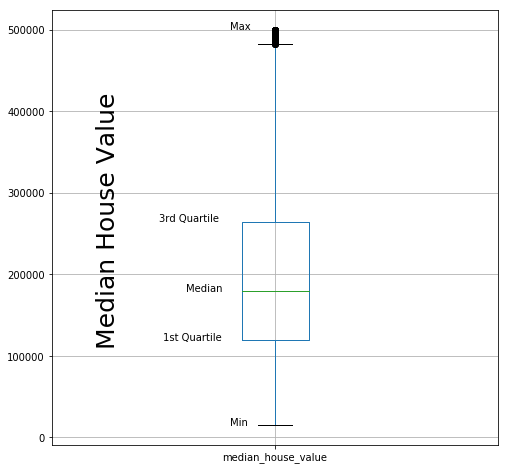

In [29]:
# this creates a boxplot 
df.boxplot(column="median_house_value",
               return_type='axes',
               figsize=(8,8))
# this puts all the fancy labels in place.  I use the varialbes we 
# made above to set the label placement on the Y axis.
plt.text(x=0.74, y=pct75, s="3rd Quartile")
plt.text(x=0.8, y=col_median, s="Median")
plt.text(x=0.75, y=pct25, s="1st Quartile")
plt.text(x=0.9, y=col_min, s="Min")
plt.text(x=0.9, y=col_max, s="Max")
plt.text(x=0.6, y=400000, s="Median House Value", rotation=90, size=25)

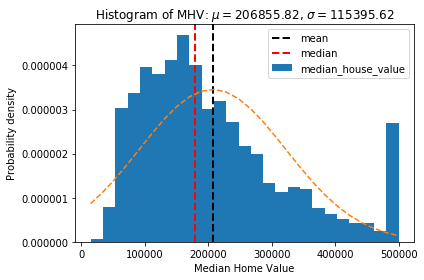

In [30]:
# fancy graph

mu = colSeries.mean()  # mean of distribution
sig = colSeries.std()  # standard deviation of distribution
x = colSeries

num_bins = 25

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# these next two line create the mean and median lines
plt.axvline(col_mean, color='k', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(col_median, color='r', linestyle='dashed', linewidth=2, label='median')

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sig)) *
     np.exp(-0.5 * (1 / sig * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Median Home Value')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of MHV: $\mu=%s$, $\sigma=%s$'%(round(mu, 2), round(sig, 2)))


# this creates the legend and includes all labels
plt.legend(loc='upper right')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

This ends the data cleaning and descriptive statistics. Now lets write out a new csv we can work with in our next step where we make some maps.

In [36]:
df.to_csv('data/housing_clean.csv')